In [2]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, dates
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
import os

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Define common parameters
begin_date = '20240101'
end_date = '20240101'
station = '8772471'
datum = 'NAVD'
time_zone = 'gmt'
units = 'metric'
format_type = 'json'

In [8]:
# Construct API URLs
prediction_api_url = (
    f'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?'
    f'begin_date={begin_date}&end_date={end_date}&station={station}&'
    f'product=predictions&datum={datum}&interval=h&time_zone={time_zone}&'
    f'units={units}&format={format_type}'
)

# Fetch and process hourly predictions
prediction_response = requests.get(prediction_api_url)
prediction_content = prediction_response.json()

prediction_data = prediction_content.get('predictions', [])
prediction_df = pd.DataFrame(prediction_data, columns=['t', 'v'])
prediction_df.rename(columns={'t': 'datetime', 'v': 'Predicted Water Level'}, inplace=True)
prediction_df['datetime'] = pd.to_datetime(prediction_df['datetime'])
prediction_df.set_index('datetime', inplace=True)
prediction_df['Predicted Water Level'] = prediction_df['Predicted Water Level'].astype(float)

In [9]:
hourly_height_api_url = (
    f'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?'
    f'begin_date={begin_date}&end_date={end_date}&station={station}&'
    f'product=hourly_height&datum={datum}&time_zone={time_zone}&'
    f'units={units}&format={format_type}'
)

# Fetch and process hourly heights
hourly_height_response = requests.get(hourly_height_api_url)
hourly_height_content = hourly_height_response.json()

hourly_height_data = hourly_height_content.get('data', [])
hourly_height_df = pd.DataFrame(hourly_height_data, columns=['t', 'v'])
hourly_height_df.rename(columns={'t': 'datetime', 'v': 'Observed Water Level'}, inplace=True)
hourly_height_df['datetime'] = pd.to_datetime(hourly_height_df['datetime'])
hourly_height_df.set_index('datetime', inplace=True)
hourly_height_df['Observed Water Level'] = hourly_height_df['Observed Water Level'].astype(float)

In [10]:
# Combine both DataFrames into one (optional)
combined_df = prediction_df.join(hourly_height_df, how='outer')

# Output the combined DataFrame
combined_df.head()

# Save the combined DataFrame to a CSV file
dataset_path = r"./Raw/WL_A_2024.csv"
combined_df.to_csv(dataset_path, index=True)

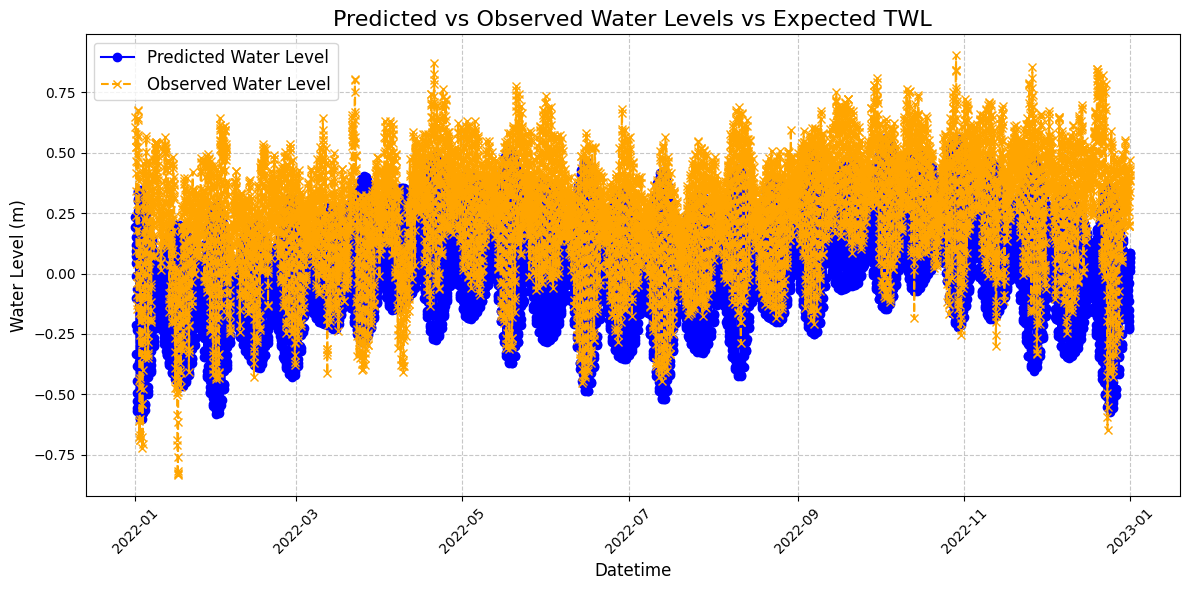

In [11]:
# Plot Predicted, Observed Water Levels, and Expected TWL
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Predicted Water Level'], label='Predicted Water Level', color='blue', linestyle='-', marker='o')
plt.plot(combined_df.index, combined_df['Observed Water Level'], label='Observed Water Level', color='orange', linestyle='--', marker='x')

# Add titles and labels
plt.title('Predicted vs Observed Water Levels vs Expected TWL', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Water Level (m)', fontsize=12)  # Adjust the unit if necessary

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [3]:
" Data at Point A "
# Read the data, skipping the header comments and setting the correct column names
dataA_2020 = pd.read_csv("Raw\\WL_A_2020.csv", sep=",", comment="#", header=1)
dataA_2020.columns = ["Datetime", "Predicted Water Level Point A", "Observed Water Level Point A"]

dataA_2021 = pd.read_csv("Raw\\WL_A_2021.csv", sep=",", comment="#", header=1)
dataA_2021.columns = ["Datetime", "Predicted Water Level Point A", "Observed Water Level Point A"]

dataA_2022 = pd.read_csv("Raw\\WL_A_2022.csv", sep=",", comment="#", header=1)
dataA_2022.columns = ["Datetime", "Predicted Water Level Point A", "Observed Water Level Point A"]

dataA_2023 = pd.read_csv("Raw\\WL_A_2023.csv", sep=",", comment="#", header=1)
dataA_2023.columns = ["Datetime", "Predicted Water Level Point A", "Observed Water Level Point A"]

dataA_2020["Datetime"] = pd.to_datetime(dataA_2020["Datetime"])
dataA_2021["Datetime"] = pd.to_datetime(dataA_2021["Datetime"])
dataA_2022["Datetime"] = pd.to_datetime(dataA_2022["Datetime"])
dataA_2023["Datetime"] = pd.to_datetime(dataA_2023["Datetime"])

dataA = pd.concat([dataA_2020, dataA_2021, dataA_2022, dataA_2023], axis=0, ignore_index=True)
dataA.to_csv('Clean\\ObservationPointA.csv', index=False) 